# Holt-Winters (Exponential Smoothing Model)

# **Requires a minimum of 2 periods (minimum 2 years of data) to product statistically significant forecasts to allow for the detection of underlying patterns like seasonality and trends**

# Simple, double, and triple exponential smoothing are methods for time series forecasting, each more complex than the last.
1. Simple exponential smoothing is for data with no trend or seasonality.  
2. Double exponential smoothing (Holt's method) adds a second smoothing parameter to account for a trend.  
3. Triple exponential smoothing (Holt-Winters method) adds a third component for seasonality.

* Use the past to predict the future giving more weight to recent information

# Advantages
* Good for non-complex forecasts with trends and seasonality
* Simple implementation
* Intututuve model
* Adaptable to changes
* Gives more weight to recent data

# Disadvantages
* Only has one seasonal component (for daily data - have to pick weekly or yearly seasonality - but NOT both)
* Model can not handel complex time series data
* Does not allow for regressors (e.g. external factors can not be used to refine the forecast)
* Relies 100% on historical data


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/0.Cloud Computing and Streaming Tech/OCI AI/0.GoogleColab/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters"

/content/drive/MyDrive/0.Cloud Computing and Streaming Tech/OCI AI/0.GoogleColab/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters


In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

## Measuring Errors
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Set the index when we import the data
df = pd.read_csv('weekly_customer_complaints.csv', index_col='week', parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [ ]:
# Change the name of the time series variable to y
df = df.rename(columns = {"complaints": "y"})
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [ ]:
# Preview of the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   y                        261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


In [ ]:
# Remove the comma from df.y and tranform into an integer
df["y"] = df["y"].str.replace(",", "").astype(int)
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


# Daily Visualization

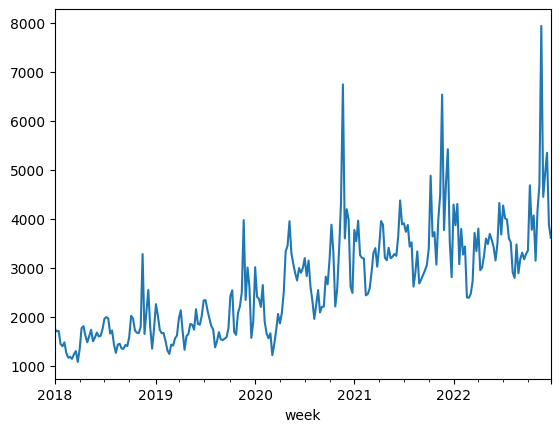

In [52]:
# Time Series Plot
df["y"].plot()
plt.show()

# Seasonality

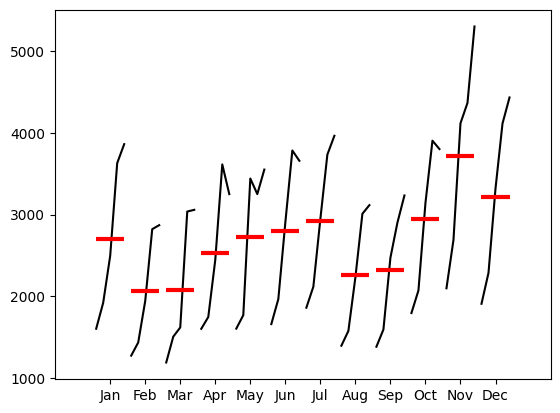

In [53]:
# Plot the month_plot
month_plot(df['y'].resample('ME').mean())
plt.show()

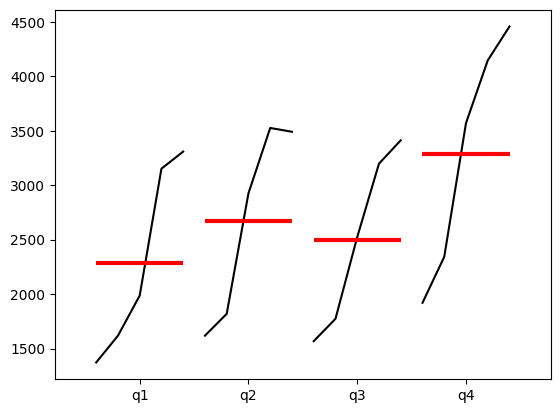

In [54]:
# Plot the quarter_plot
quarter_plot(df['y'].resample("QE").mean())
plt.show()

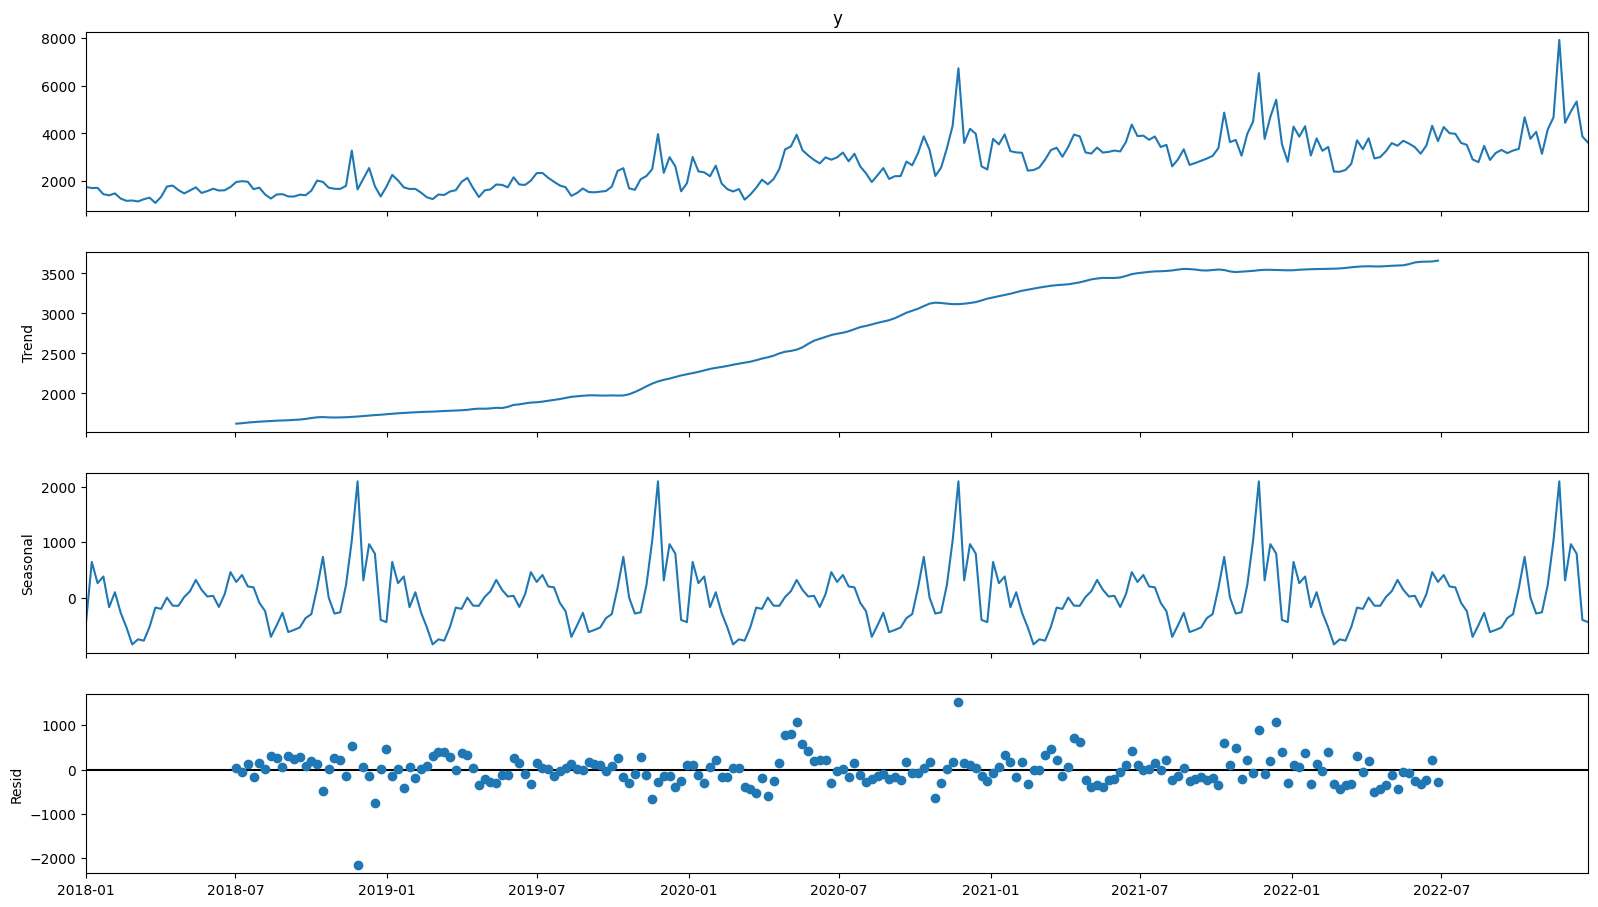

In [55]:
# Seasonal decompositon for df['Adj.Close']
decompositon = seasonal_decompose(df['y'],
                                  model = 'additive',
                                  period = 52)
fig = decompositon.plot()
fig.set_size_inches(18, 10)
plt.show()

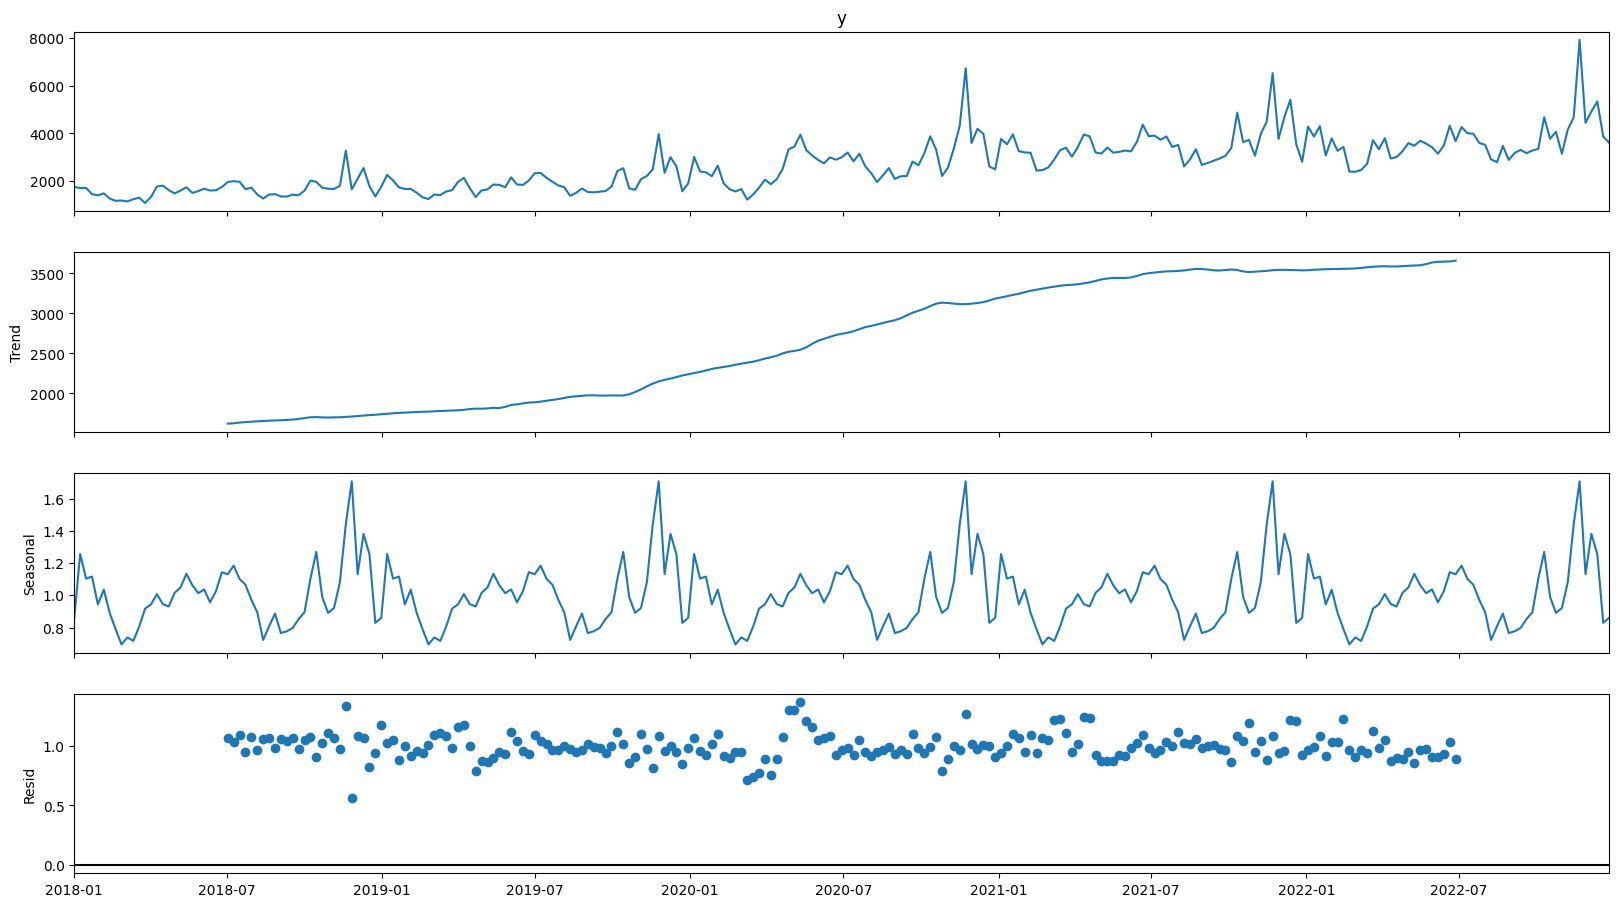

In [56]:
# Seasonal decompositon for df['Adj.Close']
decompositon = seasonal_decompose(df['y'],
                                  model = 'multiplicative',
                                  period = 52)
fig = decompositon.plot()
fig.set_size_inches(18, 10)
plt.show()

# (Partial) Auto-Correlation

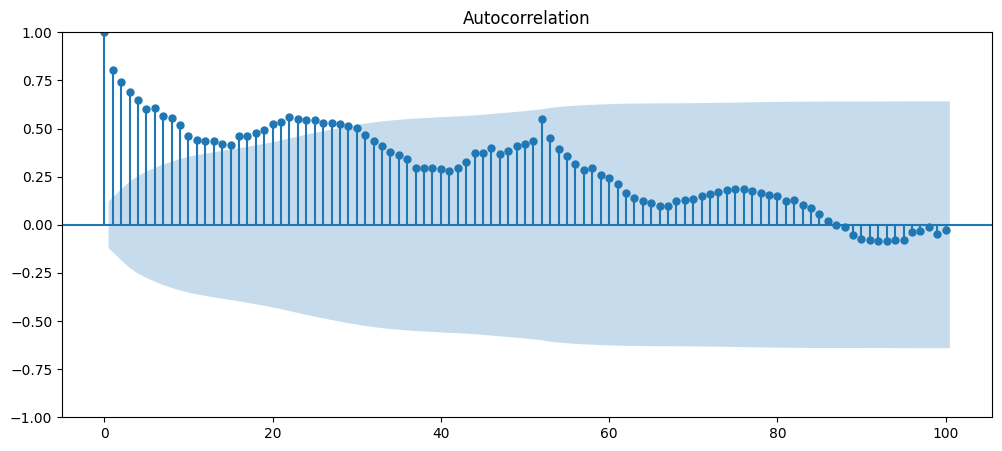

In [57]:
# Plot the ACF of the Auto-Correlation
fig, ax = plt.subplots(figsize = (12, 5))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

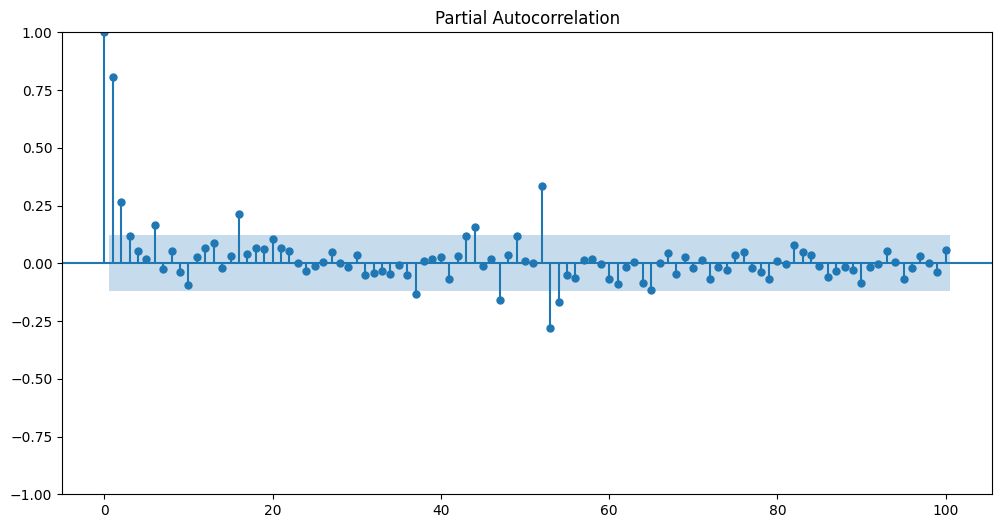

In [58]:
# PACF
fig, ax = plt.subplots(figsize = (12, 6))
plot_pacf(df['y'], lags = 100, ax = ax)
plt.show()

# Time Series Frequency

In [59]:
# Print the frequency of the time series
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [60]:
# Change the frequency to W-Mon
df = df.asfreq('W-Mon')
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

# Training and Test

# GOAL: Predict the next 13 weeks

In [61]:
# Split the data into training and test

In [62]:
periods = 13
train = df[:-periods].y
test = df[-periods:].y

In [63]:
# Other way to split data
# train, test = df.iloc[:-periods, 0], df.iloc[-periods:, 0]

In [64]:
train.tail()

,y
week,
2022-08-29,2885
2022-09-05,3177
2022-09-12,3306
2022-09-19,3170
2022-09-26,3279


# Forecasting

Next Forecast = Current Level + alpha * (Recent Actual - Current Level)

(Recent Actual - Current Level) - is the delta

* Current Level - this is the baseline
* Recent Actual - most recent obervations
* Alpha - This is the fine tuner (applying an adjustment to the calculation to forecast the future)

# 1. Simple Exponential Smoothing - For smoothing out the data

In [65]:
# Apply SES t othe train data
ses_model = SimpleExpSmoothing(train).fit()
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                      y   No. Observations:                  248
Model:             SimpleExpSmoothing   SSE                       74355478.081
Optimized:                       True   AIC                           3131.513
Trend:                           None   BIC                           3138.540
Seasonal:                        None   AICC                          3131.678
Seasonal Periods:                None   Date:                 Sat, 25 Oct 2025
Box-Cox:                        False   Time:                         02:25:42
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5097819                alpha                 True
initial_level              1750.0000                

In [66]:
# Compute with the initial level calculation
# train.iloc[-1] * 51 + 1750

In [67]:
# Predictions
ses_pred = ses_model.forecast(periods)
ses_pred

,0
2022-10-03,3236.663473
2022-10-10,3236.663473
2022-10-17,3236.663473
2022-10-24,3236.663473
2022-10-31,3236.663473
2022-11-07,3236.663473
2022-11-14,3236.663473
2022-11-21,3236.663473
2022-11-28,3236.663473
2022-12-05,3236.663473


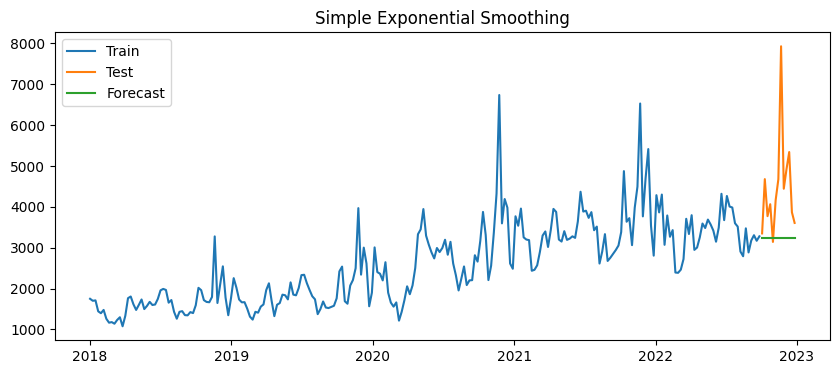

In [68]:
# Set the size of the plot of: 10 by 4
plt.figure(figsize = (10,4))

# Plot the train, test and forecast data
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_pred, label = 'Forecast')

# Add a title and legent to the plot
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

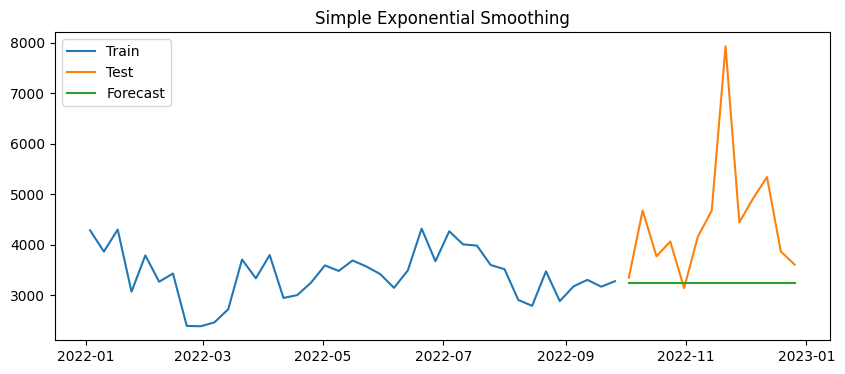

In [69]:
# Set the size of the plot of: 10 by 4
# NOTE - Green line is the forecast - This is a bad forecast
plt.figure(figsize = (10,4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_pred, label = 'Forecast')

# Add a title and legent to the plot
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

# 2. Double Exponential Smoothing - For picking up the trends in the data

Smooths out the data and accounts for trends in the data. 2 formulas:  

* Smoothed Teve = (alpha * Recent Actual) + [(1 - alpha) * (Previous Level - Previous Trend)]

* Smmothed Trend = beta * (Smoothed Level - Previous Level) + [(1 - beta) * Previous Trend)].
  
* alpha - adjusts how much we consider the recent sales v's the previous level and trend
* beta - tunes how much weight we give to the change in the trend
* Double exponential smoothing reveals overall upward trend, smoothing weekly fluctuations

*Does NOT account for seasonality*


In [70]:
# Build double exponential smoothing model
model_double = ExponentialSmoothing(
    endog = train,
    trend='add',
    seasonal=None).fit()
print(model_double.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       74343958.374
Optimized:                         True   AIC                           3135.474
Trend:                         Additive   BIC                           3149.528
Seasonal:                          None   AICC                          3135.823
Seasonal Periods:                  None   Date:                 Sat, 25 Oct 2025
Box-Cox:                          False   Time:                         02:25:43
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5093872                alpha                 True
smoothing_trend             0.0000

In [71]:
# Predict with the double ES model
double_pred = model_double.forecast(periods)
double_pred

,0
2022-10-03,3248.184263
2022-10-10,3254.072668
2022-10-17,3259.961074
2022-10-24,3265.849480
2022-10-31,3271.737885
2022-11-07,3277.626291
2022-11-14,3283.514697
2022-11-21,3289.403102
2022-11-28,3295.291508
2022-12-05,3301.179913


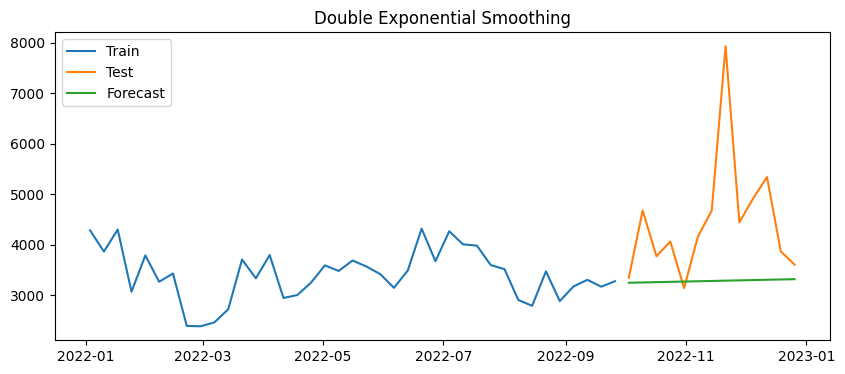

In [72]:
# Plot the train, test and forecast
# Green line is the forecast
plt.figure(figsize = (10,4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(double_pred, label = 'Forecast')

# Add a title and legend to the plot
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

# 3. Triple Exponential Smoothing (Holt-Winters Method) - Accounts for seasonality

Holt-Winters is highly effective in forecasting where data has recurring patterns

Data is split into 3 levels:
1. Baseline level - Alpha
2. Assesses the increasing/decreasing trend over time - Beta
3. Seasonality - Gamma

Overview:  
* Starts by adjusting the level
* Looks at how the average trend has changed over time
* Looks at the repeating cycles


Coefficients - alpha, beta, gamma controls component weights



In [73]:
# Build Holt-Winters model
model_holt = ExponentialSmoothing(
    endog = train,
    trend='add',
    seasonal='mul',
    seasonal_periods=52).fit()
print(model_holt.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       21600694.698
Optimized:                         True   AIC                           2932.952
Trend:                         Additive   BIC                           3129.704
Seasonal:                Multiplicative   AICC                          2969.164
Seasonal Periods:                    52   Date:                 Sat, 25 Oct 2025
Box-Cox:                          False   Time:                         02:25:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2491205                alpha                 True
smoothing_trend          

In [74]:
# Predict with the Holt-Winters model
holt_pred = model_holt.forecast(periods)
holt_pred

,0
2022-10-03,4041.207635
2022-10-10,5040.723320
2022-10-17,3932.012234
2022-10-24,3531.280108
2022-10-31,3441.245496
2022-11-07,4260.279187
2022-11-14,5352.834107
2022-11-21,7238.316196
2022-11-28,4359.198254
2022-12-05,5316.729751


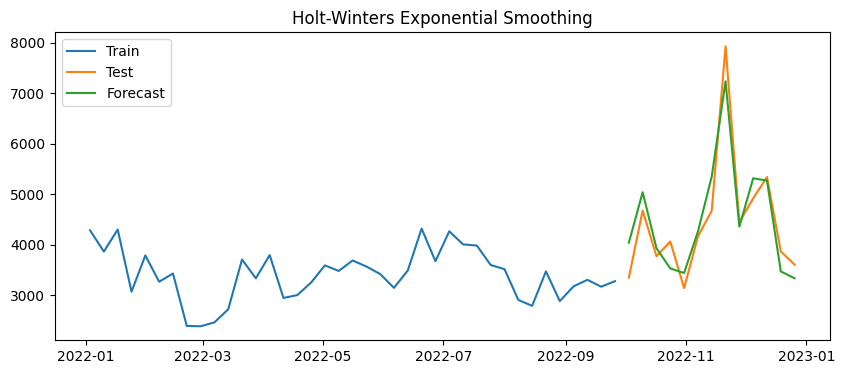

In [75]:
# Plot the Train, Test and Forecast
plt.figure(figsize = (10,4))

# Plot the train, test and forecast
plt.plot(train.loc['2022'], label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(holt_pred, label = 'Forecast')

# Add a title and legend to the plot
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

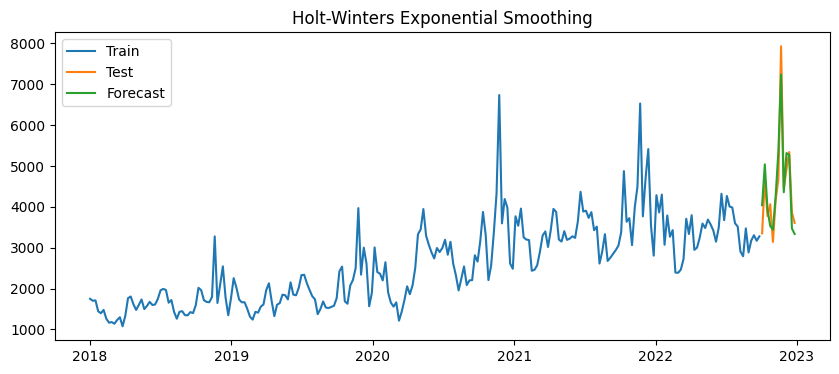

In [76]:
# Plot the Train, Test and Forecast
plt.figure(figsize = (10,4))

# Plot the train, test and forecast
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(holt_pred, label = 'Forecast')

# Add a title and legend to the plot
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

# Measuring accuracy errors in time series forecasting

* Mean absolute error (MAE) - An average of the absolute differences between the actual and predicted values
* Root mean squared error (RMSE) - Root average of the squared differences between actual and predicted values
* Mean absolute percentage delta (MAPE) - Average error in percentage format

In [77]:
# Calculate and print the RMSE, MAE and MAPE
rmse = root_mean_squared_error(test, holt_pred)
mae = mean_absolute_error(test, holt_pred)
mape = mean_absolute_percentage_error(test, holt_pred)

print(f"RMSE: {rmse:.0f}")
print(f"MAE: {mae:.0f}")
print(f"MAPE: {100 * mape:.1f} %")

RMSE: 425
MAE: 364
MAPE: 8.4 %


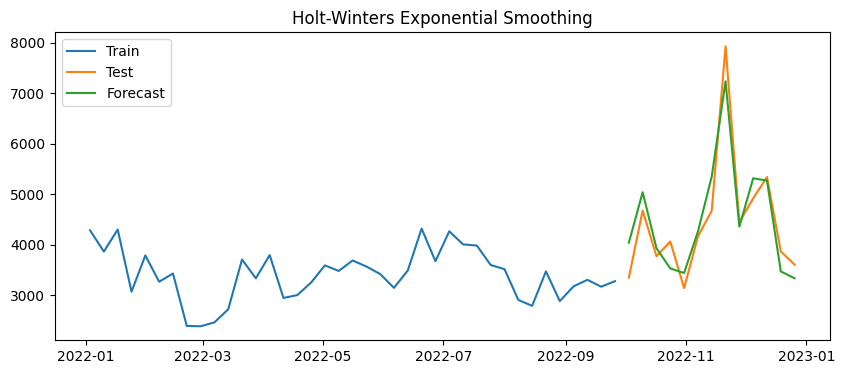

RMSE: 425
MAE: 364
MAPE: 8.4 %


In [80]:
# Function that assesses the model and visualise the train, test and foredast
def model_assessment(train, test, predictions, chart_title = None):
  # Set the size of the plot to 10 by 4
  plt.figure(figsize = (10,4))

  # Plot the train, test and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = 'Forecast')
  plt.title("Holt-Winters Exponential Smoothing")
  plt.legend()
  plt.show()

  # Calculate and print the RESE, MEA and MAPE
  rmse = root_mean_squared_error(test, predictions)
  mae = mean_absolute_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  print(f"RMSE: {rmse:.0f}")
  print(f"MAE: {mae:.0f}")
  print(f"MAPE: {100 * mape:.1f} %")

# Apply the function
model_assessment(train.loc['2022'], test, holt_pred, 'Holt-Winters Exponential Smoothing')

RMSE: 425
MAE: 364
MAPE: 8.4 %

# Predicting the Future

In [81]:
# Explore the dataframe
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


In [82]:
# Build a Holt-Winters Model with the complete data
model_holt_complete = ExponentialSmoothing(
    endog = df.y,
    trend='add',
    seasonal='mul',
    seasonal_periods=52).fit()

In [83]:
# Predict with the model on the 13th week to predict against the foecast
forecast = model_holt_complete.forecast(13)
forecast[:5]

,0
2023-01-02,4965.837323
2023-01-09,4478.091513
2023-01-16,4699.515551
2023-01-23,3814.120124
2023-01-30,4242.022859


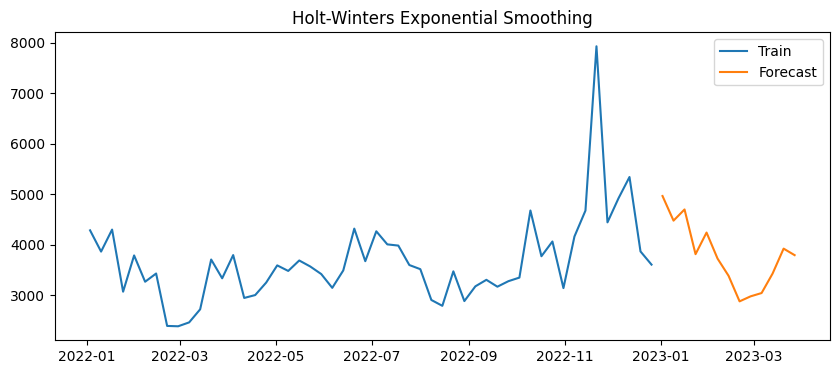

In [87]:
def plot_future(y, forecast, chart_title = None):
  # Plot the training data and foreast
  plt.figure(figsize = (10,4))

  # Plot the train, test and forecast
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = 'Forecast')

  # Add a title and legent to the plot
  plt.title('Holt-Winters Exponential Smoothing')
  plt.legend()
  plt.show()

# Apply the function
plot_future(df.y.loc["2022"], forecast, 'Holt-Winters Exponential Smoothing')